<a href="https://colab.research.google.com/github/Tha-vw/Data-Engineering/blob/main/MVP_Data_Engineering_TW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Data Engineering**
---

#####Thaiz Wyns
<br>


This notebook is part of the PUC-Rio Postgraduation Course in Data Science & Analytics.
<br><br>
Sprint II: Data Engineering.
<br><br>
The steps covered in this project circle around building a data pipeline using cloud technology. I have combined Azure Databricks for the use of SQL, with Google Colab notebook to deliver responses to the business problem as clear as possible.

The data pipeline will cover ETL process (Extract, Transform and Load), involving data search, collection, modeling, loading and analysis.

## Table of contents
1. Problem Definition and Objective<br>
    1.1 Problem Definition<br>
    1.2 Objective
2. Development Breakdown<br>
    2.1 Data Search<br>

    2.2 Data Collection<br>
    2.2.1 Exploratory Analysis<br>

    2.3 Data Modeling<br>
    2.3.1 Data Catalog<br>
    2.3.2 Data Lineage<br>

    2.4 Data Loading<br>
    2.4.1 ETL Pipeline - SQL<br>
    2.4.2 ETL Pipeline - Medallion Layers showcase<br>

    2.5 Data Analysis<br>
    2.5.1 Data Quality<br>
    2.5.2 Problem Solution

3. Conclusion<br>
   
4. Further Considerations<br>
    
5. Self-evaluation<br>
    


## 1.1 Problem Definition
In the years of my experience in Human Resource (HR) Management, there has always been the irreversible problem of attrition. Attrition in organizations means high levels of business costs, including disruption in human productivity, new hirings and training efforts. On the other hand, for the employees, it means they leave their organizations for unpredictable or uncontrollable reasons. Some of the causes of attrition include but are not limited to: job satisfaction, peers relationship, time within the organization, lack of recognition, lack of career development, inadequate training, amongst others.
<br>

HR or People Analytics professionals have raised this type of concern, which is now being looked into and analyzed in order to identify such expected and yet serious business challenge.

Therefore, our focus is on:

***- What may contribute to the levels of attrition in a company?***



## 1.2 Objective

Through the analysis of the IBM HR Analytics Employee Attrition & Performance dataset, a sample of questions will be used to gather potential insights and relationships for the attrition problem described above.

The dataset provides information on various factors such as age range, department, education, environment satisfaction, gender, job involvement, job role, job satisfaction, monthly income, years an employee worked in the company, amongst other factors. This data is pivotal for analyzing the reasons behind employee attrition and identifying patterns or trends that may contribute to it. It helps the business understand the demographics and preferences of employees and make informed decisions to improve employee retention and satisfaction.<br><br>

From those elements, we will try to answer the following questions:

1- What is the attrition rate per department?<br><br>

2- Do JobSatisfaction, EnvironmentSatisfaction and RelationshipSatisfaction have strong impact on attrition?<br><br>

3- What are the JobSatisfaction, EnvironmentSatisfaction and RelationshipSatisfaction rates for those employees who have left the organization (experienced attrition)?<br><br>

4- What are the JobSatisfaction, EnvironmentSatisfaction and RelationshipSatisfaction rates for those employees who are currently working in the organization?<br><br>

5- What is the attrition rate for employees based on the number of years they have worked at the company?<br><br>

6- What is the percentage salary hike for the employees who currently work in the organization and for the ones who have left the company (experienced attrition)?<br><br>

7- Does the high or low JobLevel (hierarchical role level) in given roles represent higher attrition rate?<br><br>

8- What is the attrition rate for employees based on the number of years they have worked in the same role?<br><br>

Please note: given the time constraints for this MVP, some other important questions are not being covered but will be taken into consideration in futures analyses.

In [ ]:
# Importing image
from IPython.display import Image
Image(url='https://www.techfunnel.com/wp-content/uploads/2020/04/employee-attrition.jpg')

# 2.0 Development Breakdown
In this session, we will look into the steps to build the data pipeline, starting with the data search, collection of this data, data modeling and data loading. This will provide us the foundation for a further analysis of the data and, thus, help us answer part or the total of our questions for employee attrition.  

## 2.1 Data Search
After various attempts to find a close-to-reality dataset with real employees data, I have come across the [IBM HR Analytics Employee Attrition & Performance from Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data), which is a fictitious dataset made by IBM scientists. It is a single file made public with 35 features. The file is widely used for People Analytics purposes and it is likely to provide good insights in the field.

## 2.2 Data Collection
Right now we have the dataset and the possibility to dive into its characteristics and usefulness for our objective.

###2.2.1 Exploratory Analysis
We will have a quick look at the dataset uploading it from Github Raw File, which had the .csv file added from Kaggle. To do that, we will import the dataset using Pandas, from the Python Library.

In [5]:
# Importing Pandas
import pandas as pd
import missingno as ms # for missings treatment
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as ms # Visualization and analysis of missing data patterns

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Dataset URL
url_data = "https://raw.githubusercontent.com/Tha-vw/Data-Engineering/main/IBM-HR-Employee-Attrition.csv?token=GHSAT0AAAAAACTS6D2BV7LVZYB723JGUPX4ZT6Y3CA"

# Read the file
ibm_attrition = pd.read_csv(url_data)

# check the dataset type
print(type(ibm_attrition))

# Show the first rows of the dataset
ibm_attrition.head()

<class 'pandas.core.frame.DataFrame'>


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
# Show a glimpse of the dataset - random sample
ibm_attrition.sample(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
1265   33        No         Non-Travel        775  Research & Development   
168    38        No      Travel_Rarely        702                   Sales   
491    43        No  Travel_Frequently       1001  Research & Development   
1116   55        No      Travel_Rarely        685                   Sales   
88     30        No      Travel_Rarely        288  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1265                 4          3  Technical Degree              1   
168                  1          4     Life Sciences              1   
491                  9          5           Medical              1   
1116                26          5         Marketing              1   
88                   2          3     Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1265            1771  ...                         4            80   
168              230  ...                         3            80   
491              663  ...                         2            80   
1116            1578  ...                         3            80   
88               117  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1265                 2                 11                      2   
168                  0                 12                      2   
491                  1                 10                      3   
1116                 1                 36                      3   
88                   3                 11                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1265               2               9                  8   
168                4               8                  3   
491                3               8                  7   
1116               3              36                  6   
88                 3              11                 10   

      YearsSinceLastPromotion  YearsWithCurrManager  
1265                        1                     7  
168                         0                     7  
491                         4                     7  
1116                        2                    13  
88                         10                     8  

[5 rows x 35 columns]

In [ ]:
# Show the size and dimension of the dataset. First number is the rows and second the columns
print(ibm_attrition.shape)

(1470, 35)


In [ ]:
# Check for null values
ibm_attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

We can confirm that there are 35 columns and no *null* values in the dataset.




## 2.3 Data Modeling
This is the phase where data storage efficiency and understanding are crucial for the upcoming data loading and analysis.

We will be using a simple flat and two-dimensional table where all data is stored in rows and columns without any hierarchical or relational structure.  





###2.3.1 Data Catalog

The data catalog is part of an effective and efficient data governance practice. It is essential for a clear and organized understanding of the data presented for the development of policies, processes and procedures, which are fundamental for the business decision making. Thus, allowing data transparency, minimizing redundancy and improving data quality for the whole organization.

The data catalog was developed in the [Github Wiki](https://github.com/Tha-vw/Data-Engineering/wiki/Attrition1_Dataset-Catalog) and it includes the table columns and attributes, their description and acceptable values / rules.  

A glimpse of the data catalog can be found below:

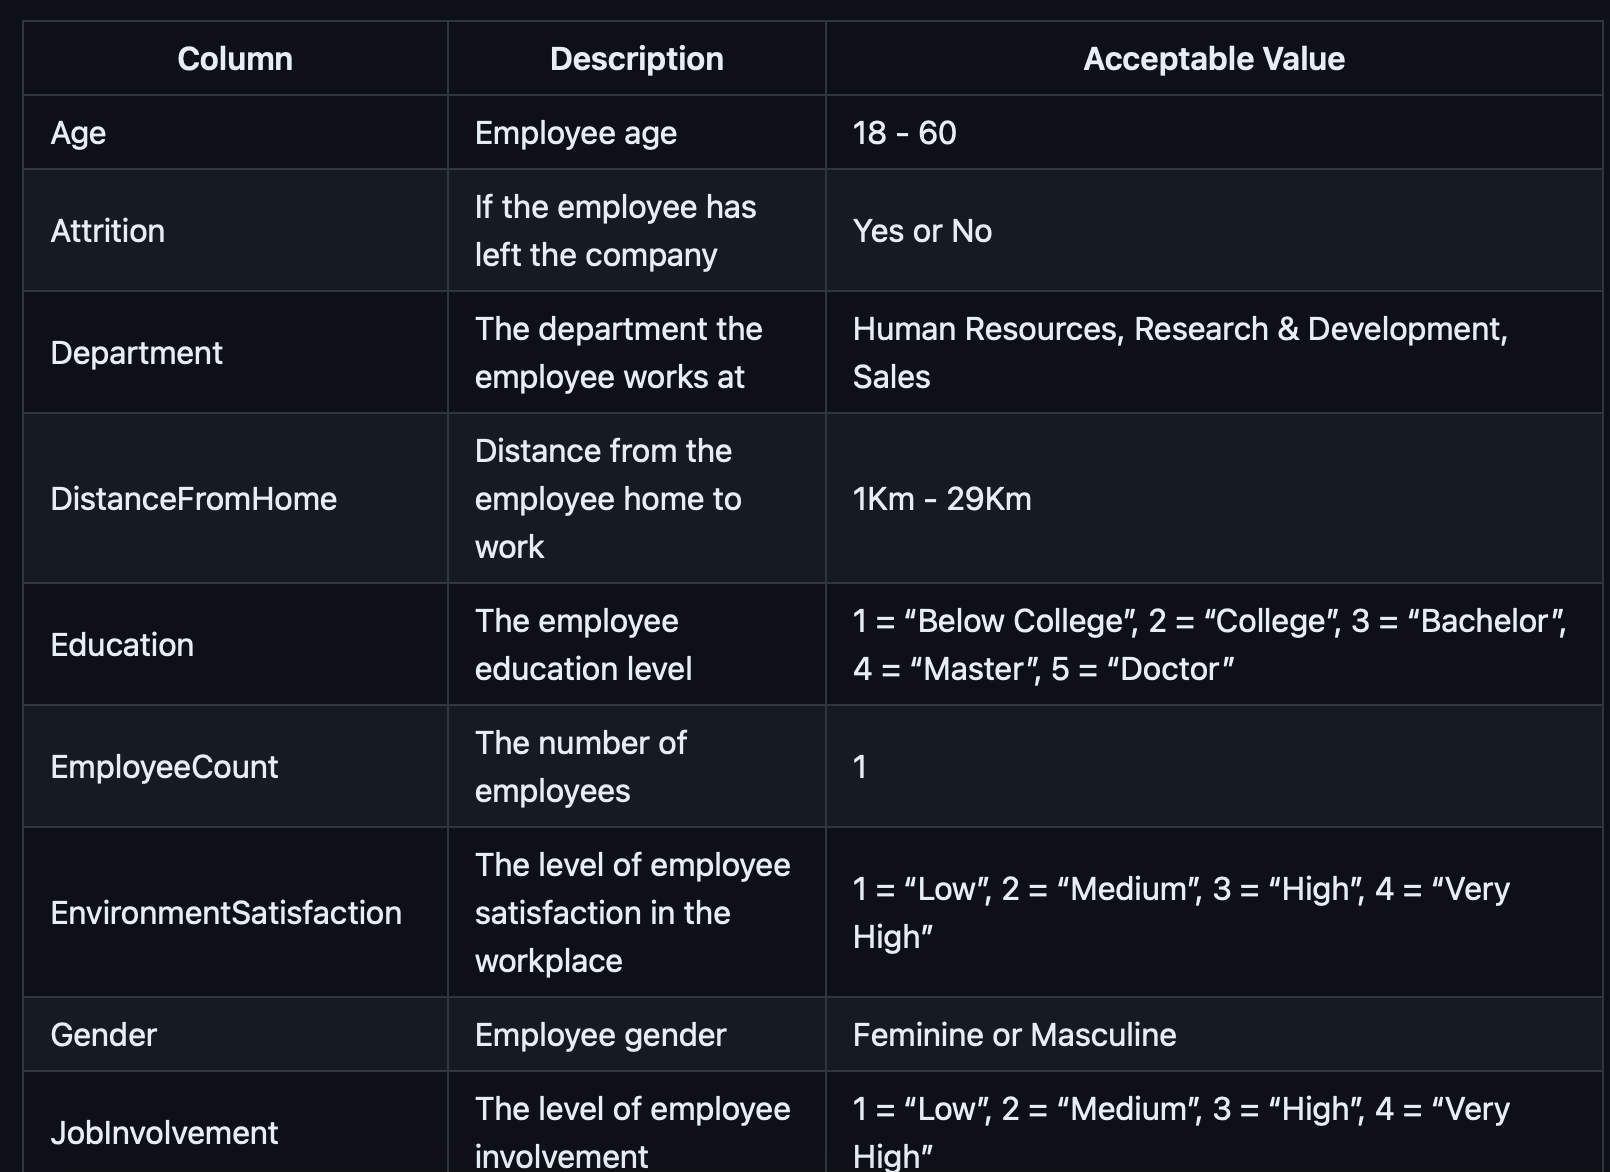



###2.3.2 Data Lineage

In order to begin this project, we had a quick look at the data by uploading it in a raw format from Github and using Python in the current Colab notebook.

Later on, with the need to remove some irrelevant columns giving the project a more in depth comprehension, we used a csv file downloaded from Kaggle to the local machine, into the Azure Databricks cloud technology.  

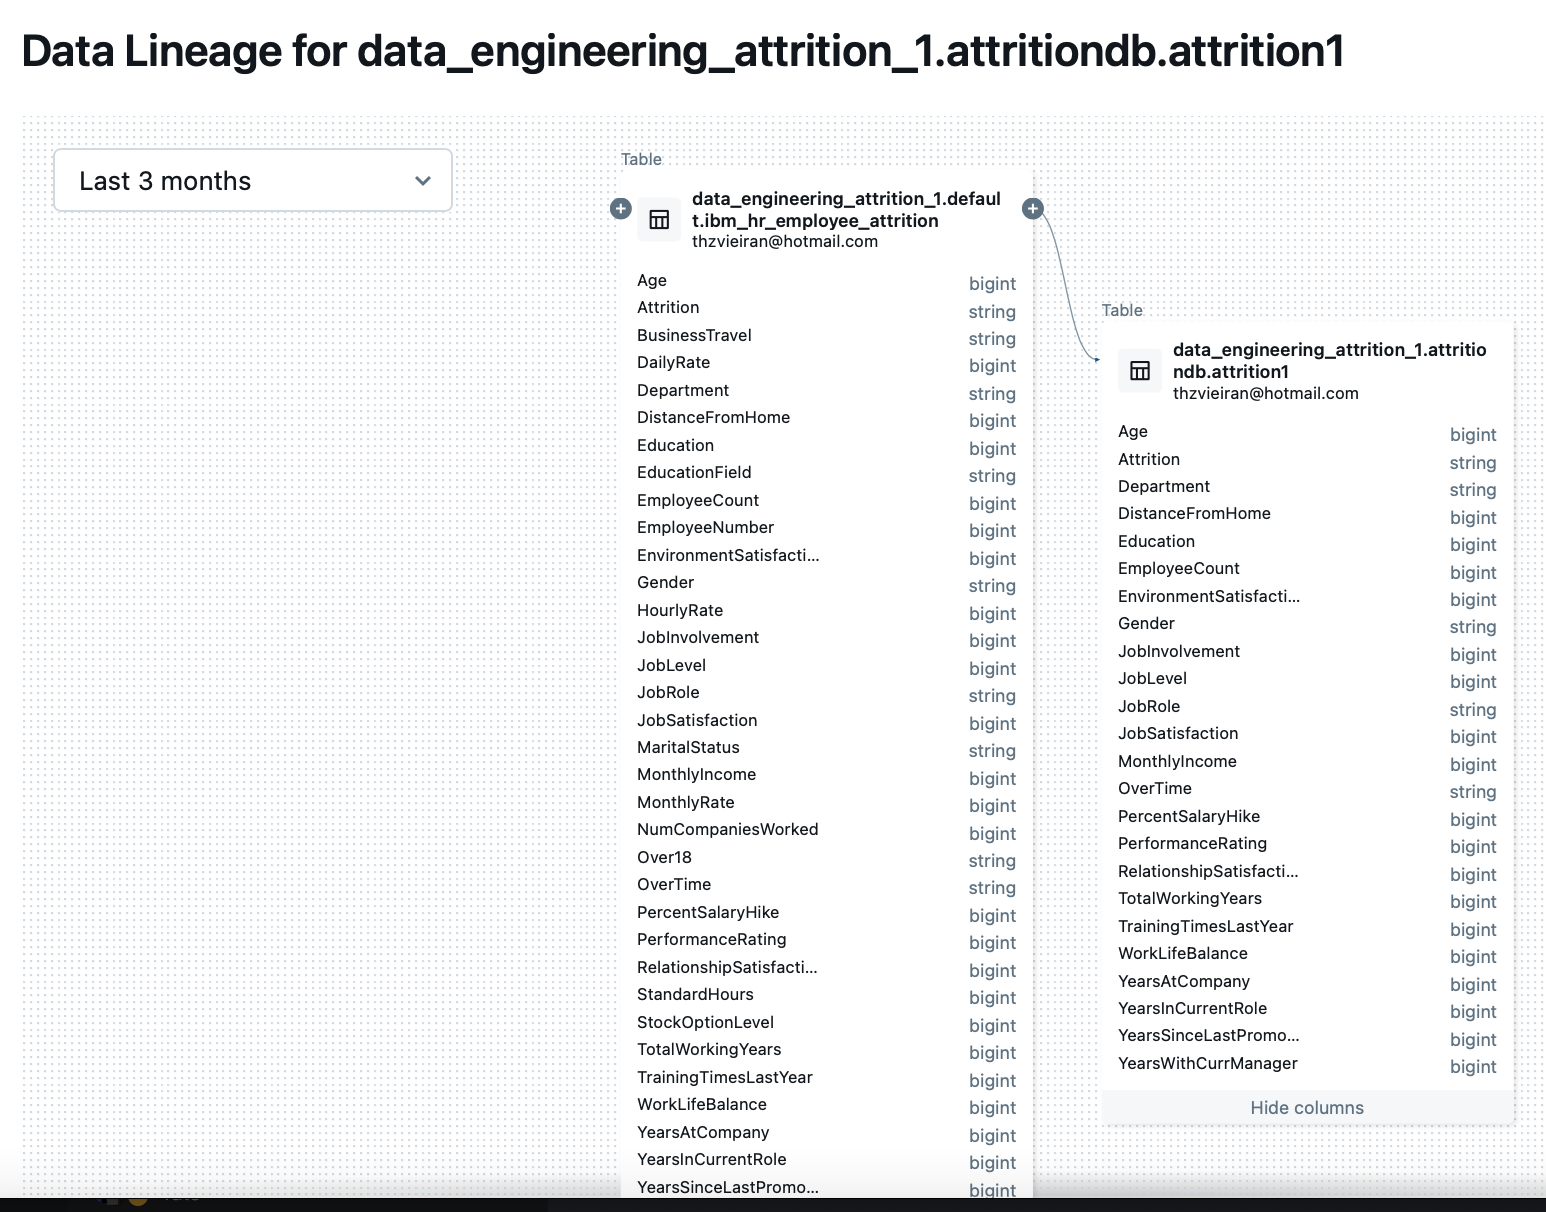

## 2.4 Data Loading
   

Let us now document the loading and ETL processes carried out in the Azure Databricks environment. The process involves the data Extraction, Transformation and Loading.

You will see this whole process done in SQL in the ETL pipeline - SQL and then a showcase for the ETL Pipeline - Medallion Layers.

In Databricks there is the Medallion layers tool that simplifies the creation of ETL data flows: bronze (for the raw data), silver (where we remove the unecessary columns) and the gold layer (where the data is ready to be used, our questions answered and it can be analysed by BI and ML).<br><br>

I have created schemas for each of the layers and could make some exploratory data as I was exercising the tool for the first time.  <br><br>

***Please note: the creation of the Medallion layers is an additional support to this MVP, as the whole ETL process was done in SQL without using the Medallion layers. I am just showing how the layers were created.***

###2.4.1 ETL Pipeline - SQL

We will start by extracting our csv 'ibm_hr_employee_attrition' file on-premise to Databricks as a table, from the top-left tab by selecting 'NEW'. We will then create a new database called 'AttritionDB' and will create a new database called 'Attrition1'. We will use a few SQL commands to alter the table, as intended.

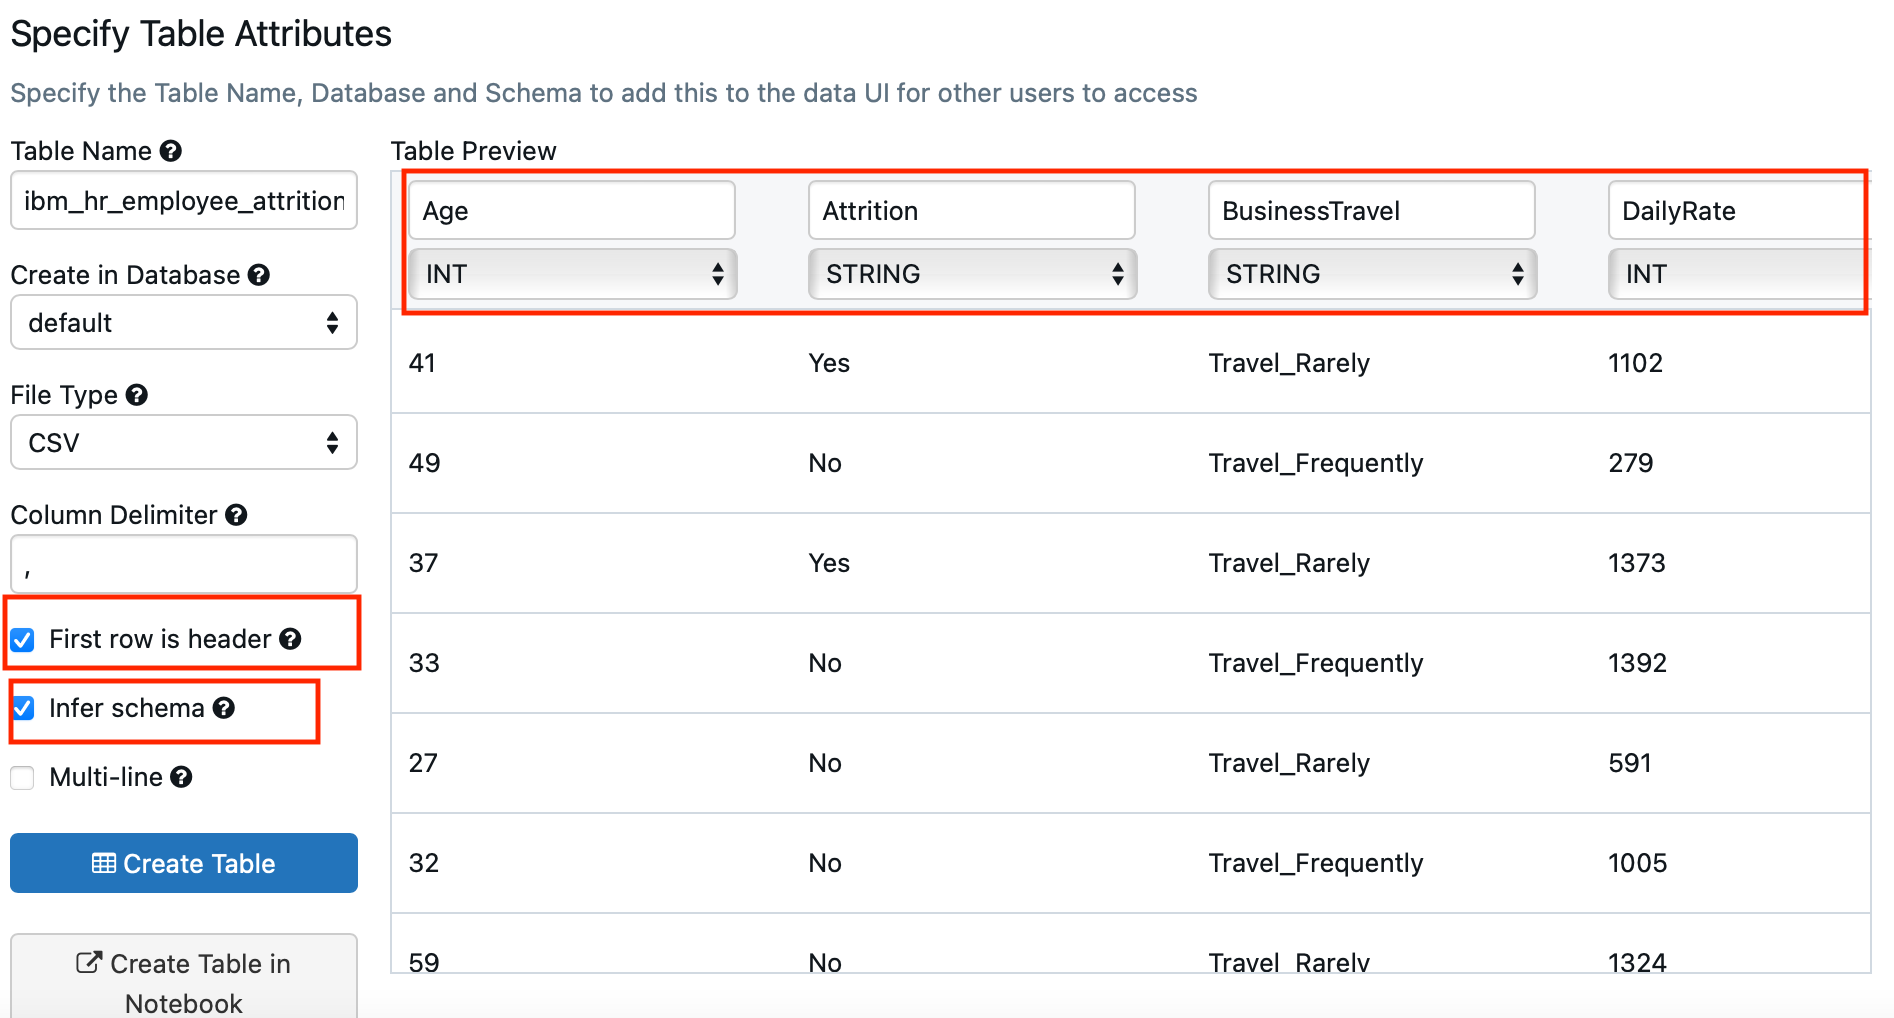




In Databricks it is possible to add the csv file and already let it infer the schemas. The file is uploaded as String but once 'Infer Schema' is selected, Databricks (DB) works the schema out nearly correctly. Once the modifications were made, you can select 'First row is header', since the headers were not being considered at first.

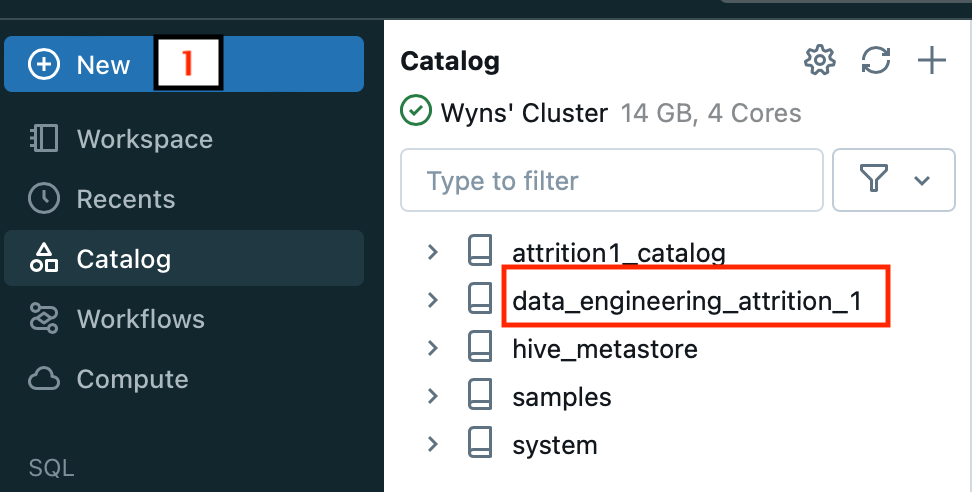

Now we will load the dataset.

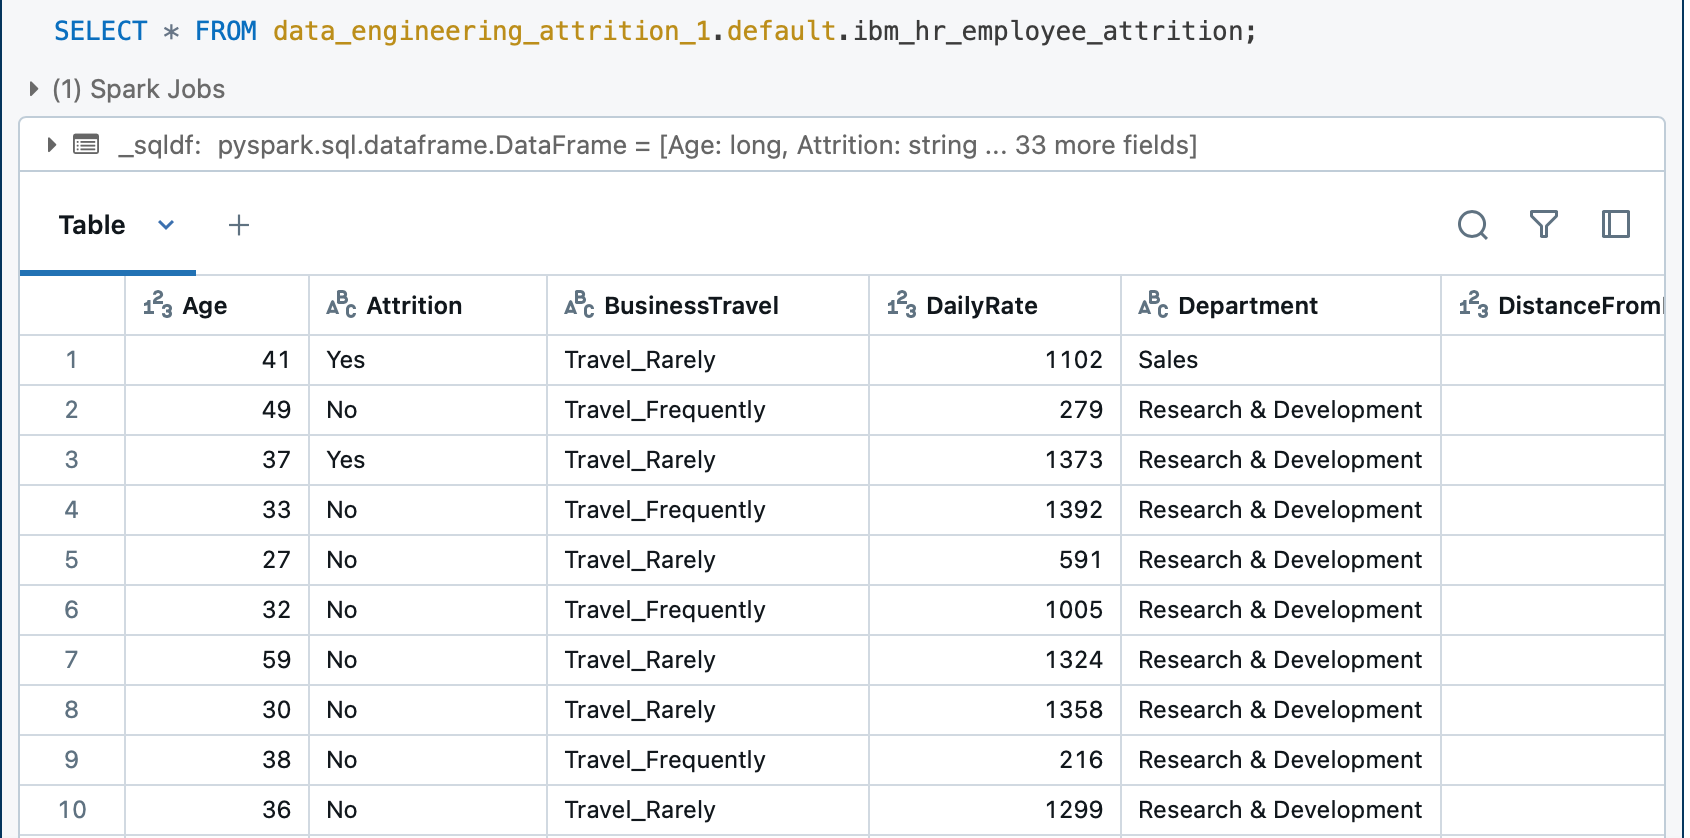

We may as well create a database and new table.

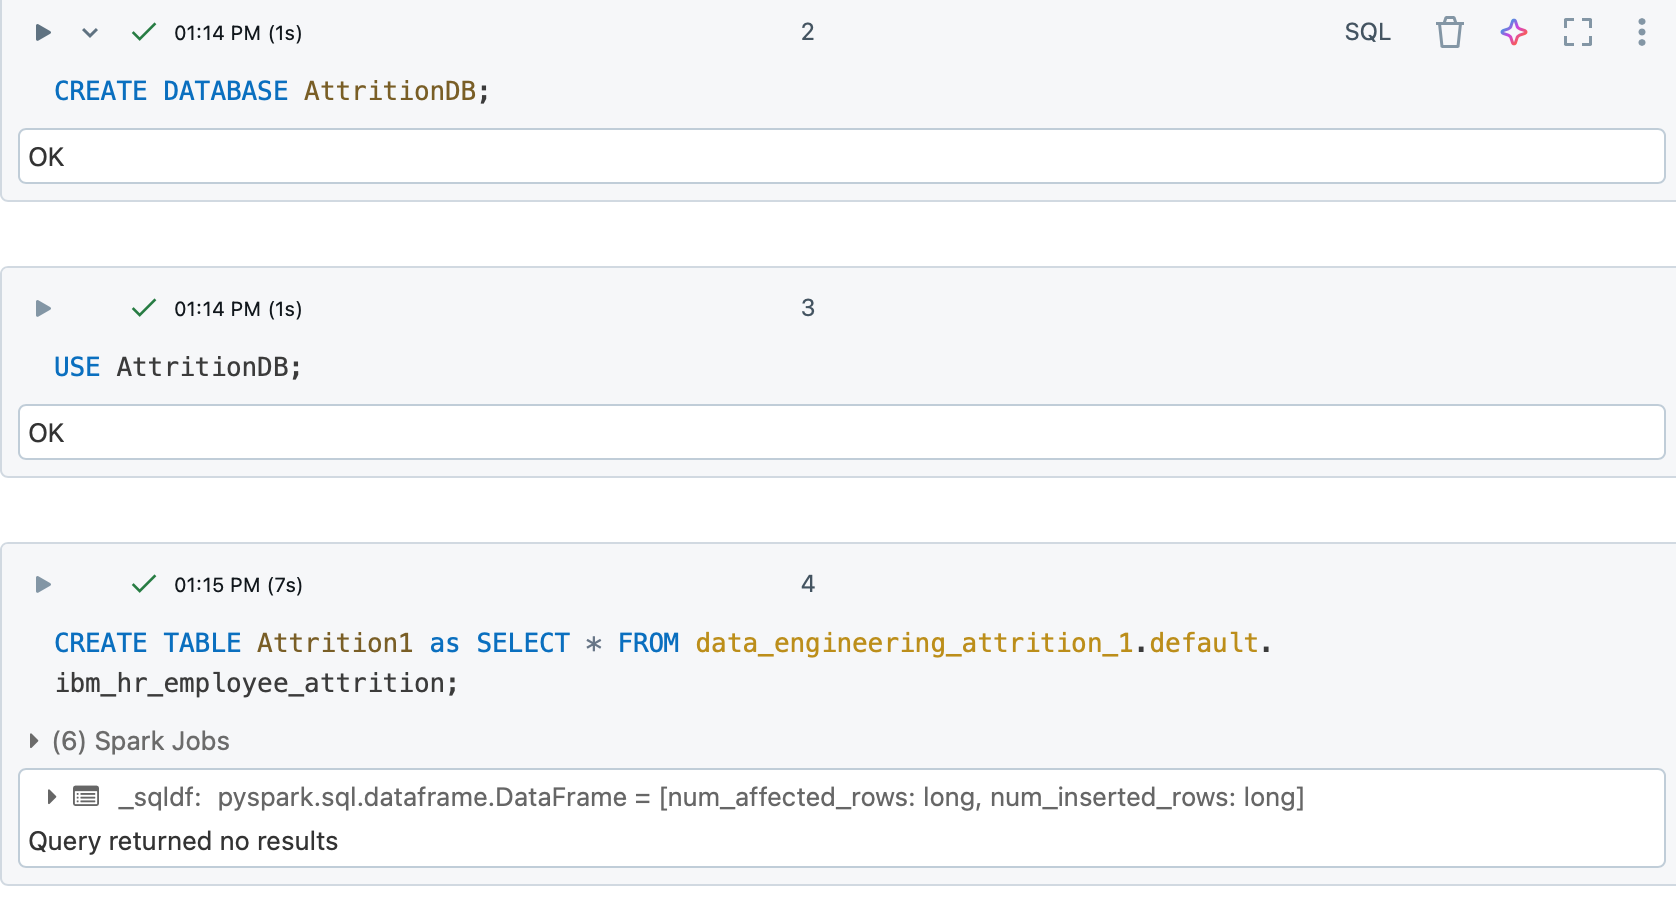

We have a look at our new table.

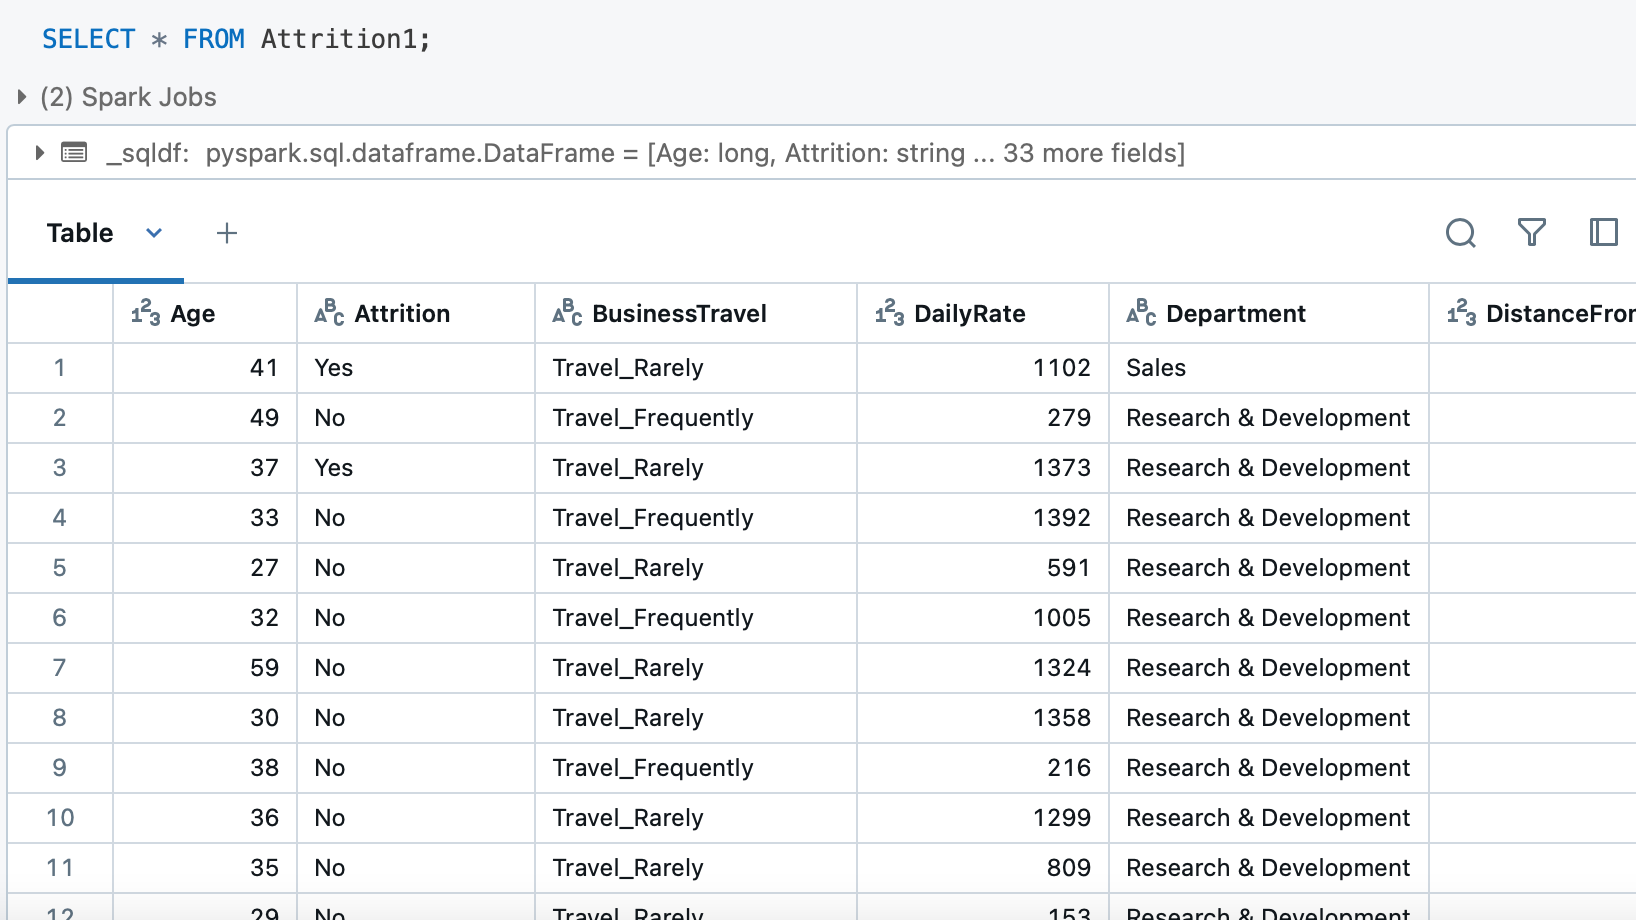

Now we will transform the data. Since the data is of absolute quality, we will remove some irrelevant columns for this analysis. We have already corrected its schema.

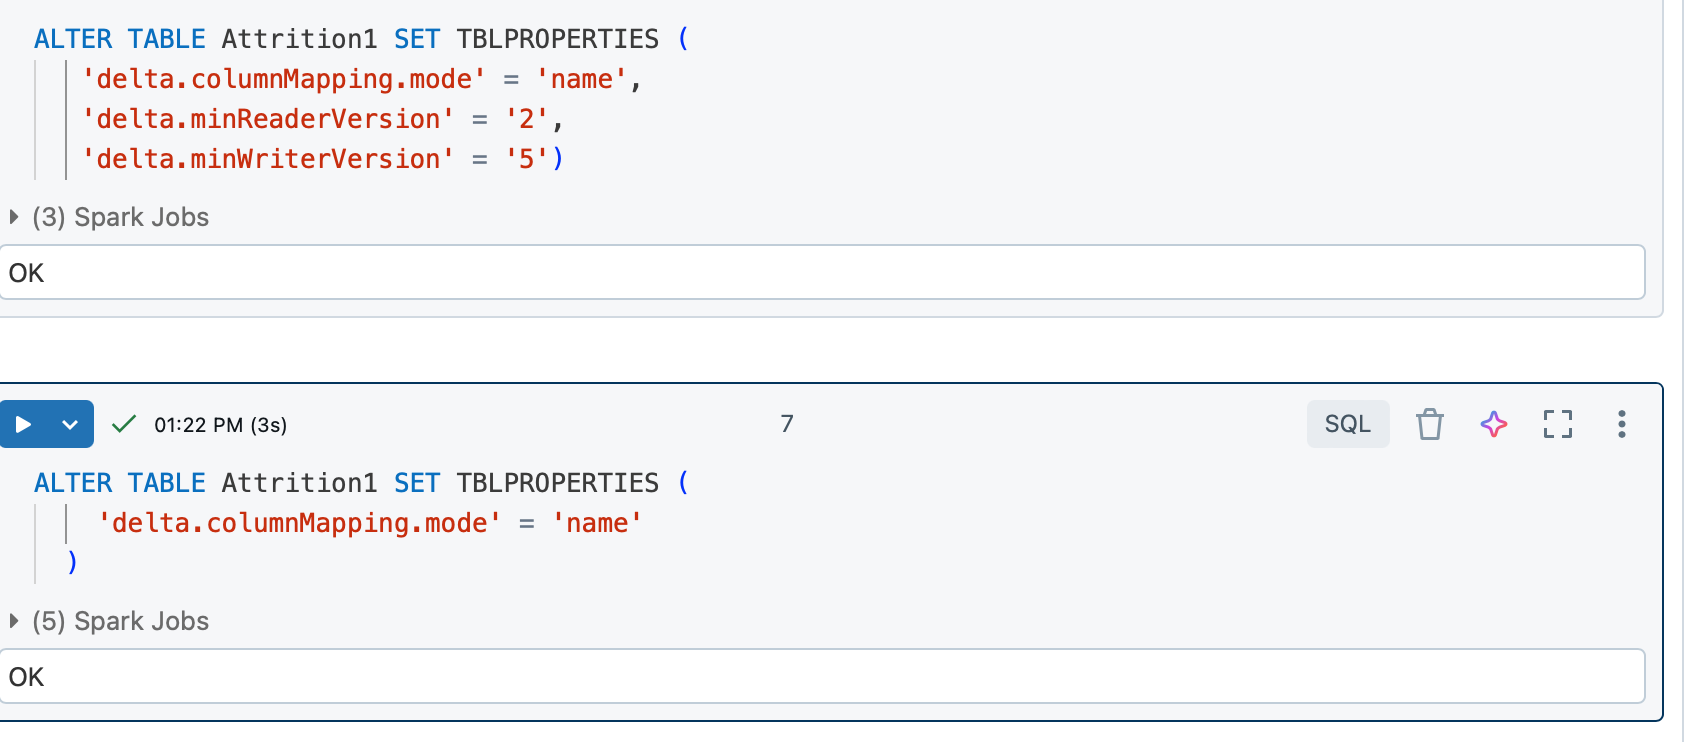

Columns were deleted for best performance and relevance using SQL. We've removed the following variables:

**BusinessTravel, DailyRate, MonthlyRate, EducationField, EmployeeNumber,HourlyRate, MaritalStatus, NumCompaniesWorked, Over18, StockOptionLevel, StandardHours**


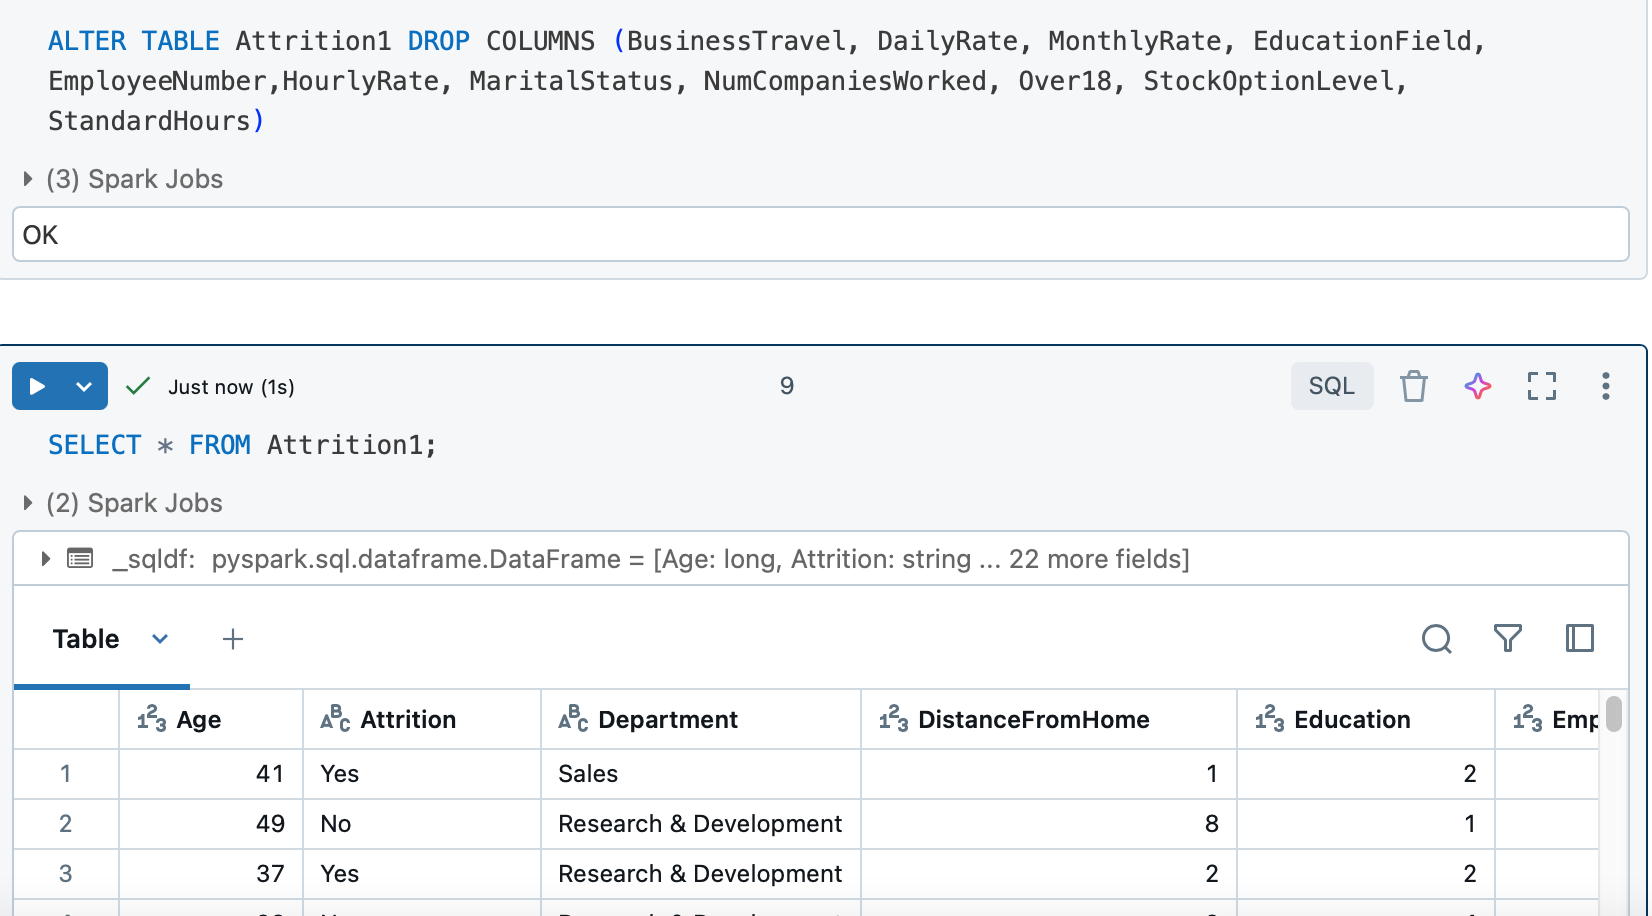

Now we are ready for the analysis phase to our objective with the help of some questions. Before that, we will quickly showcase the Medallion layers process, as follows.

###2.4.2 ETL Pipeline - Medallion Layers showcase


We extract the raw data from github to Databricks.

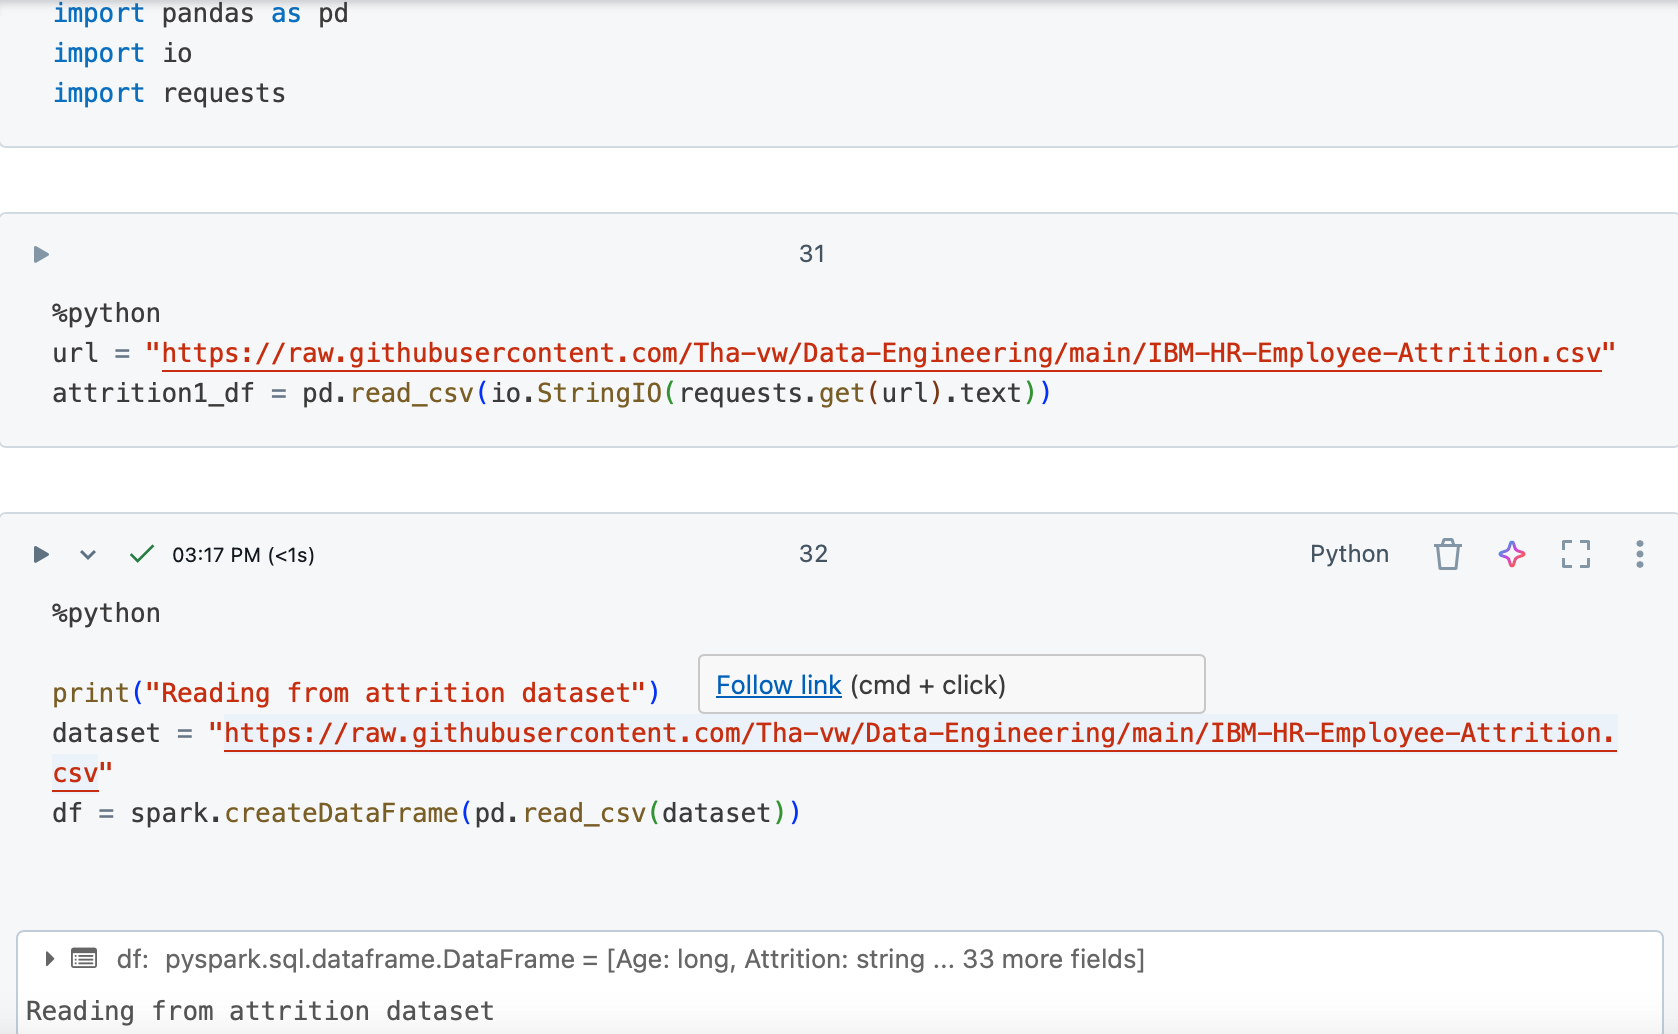

Then we save the dataset to parquet into dbfs.

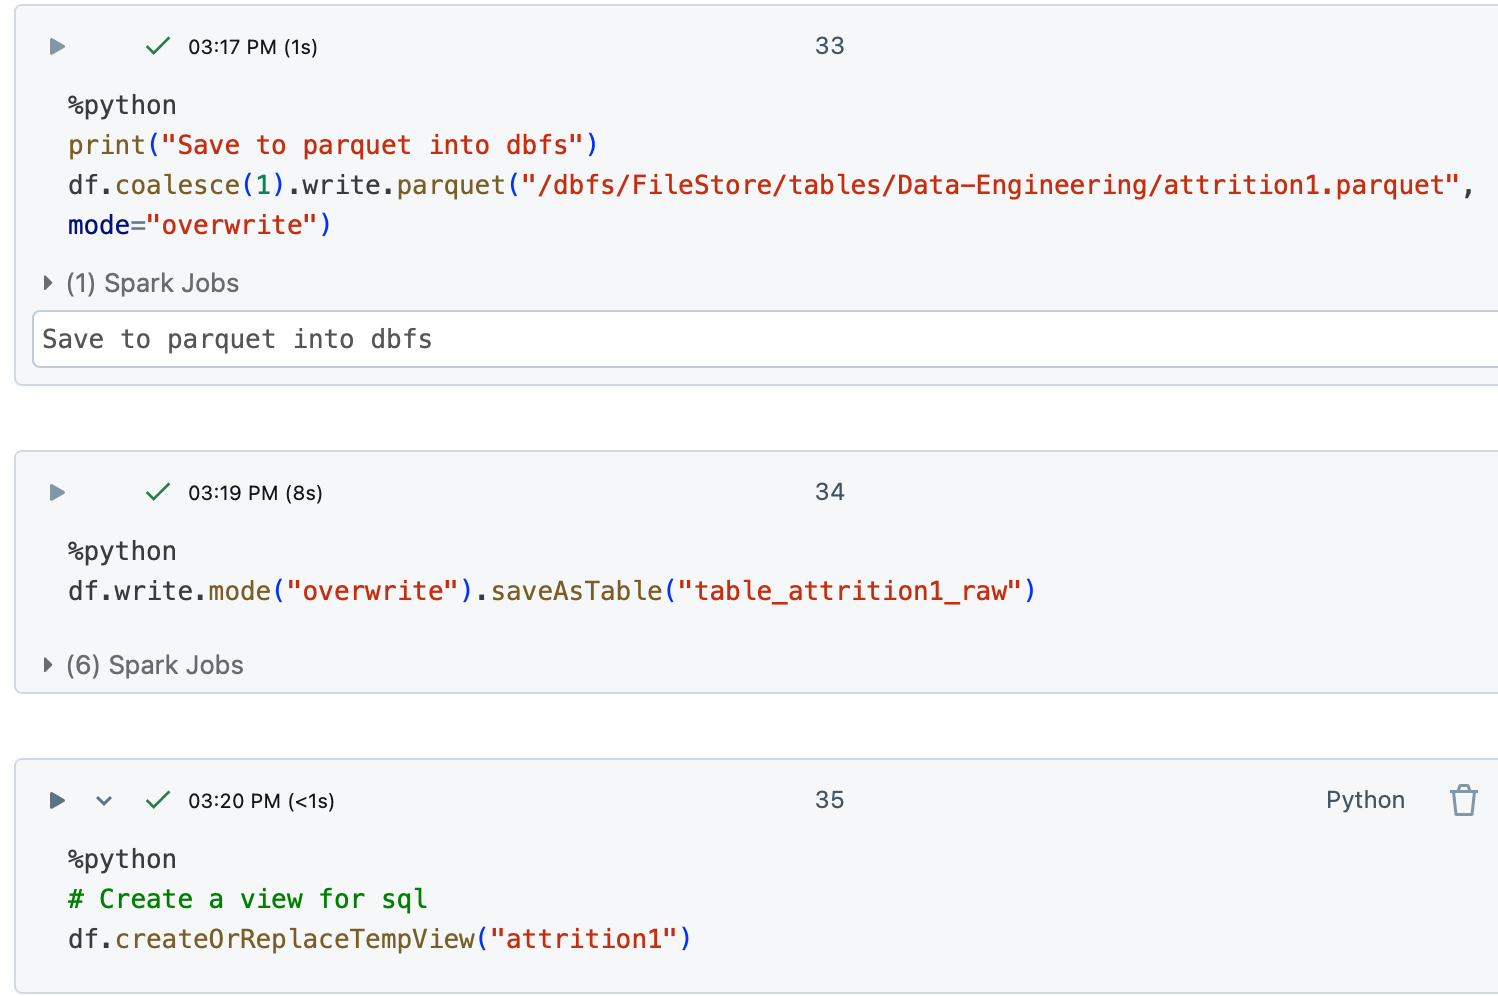

In Databricks we need to create schemas so we created schemas for bronze, silver and gold layers.

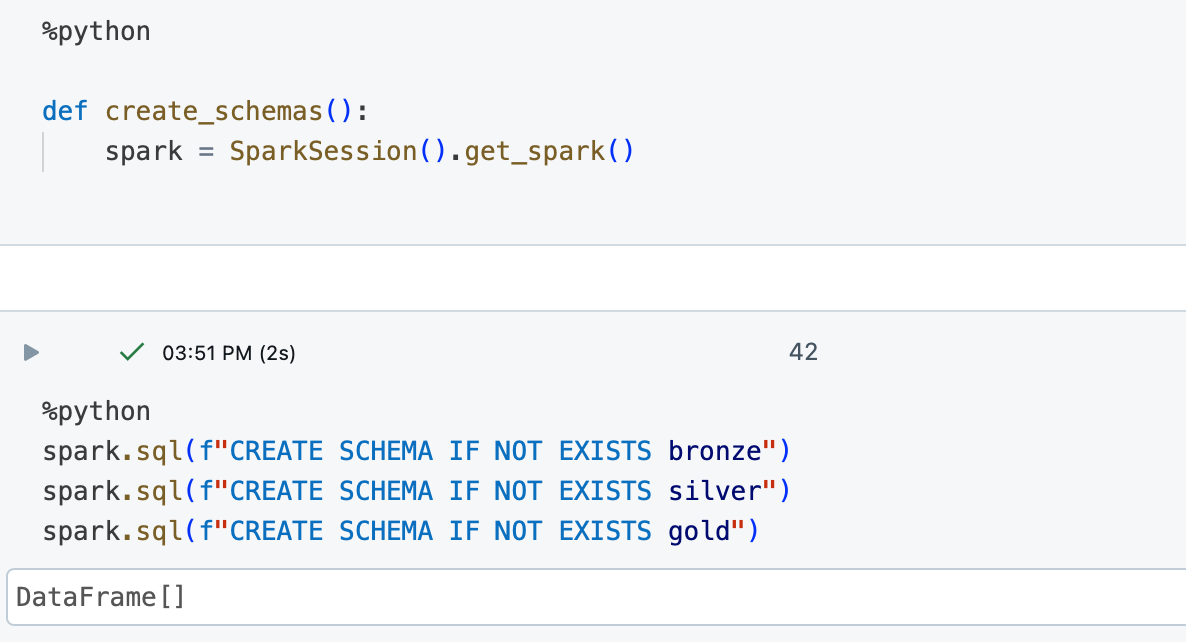

And ensure the schemas exist.

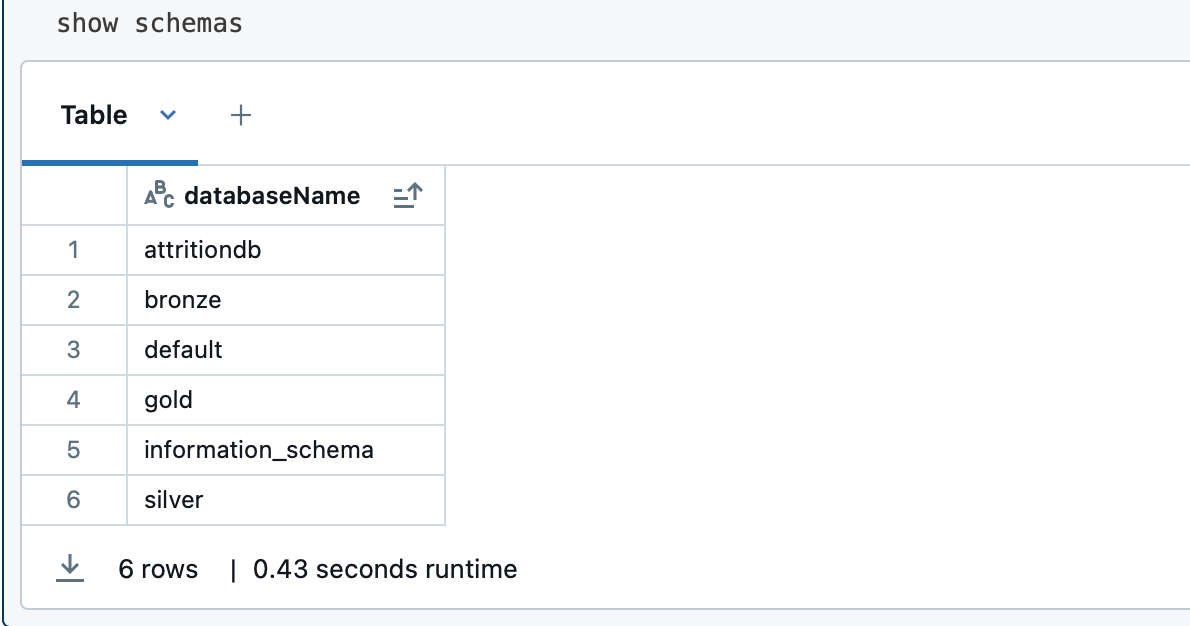

## 2.5 Data Analysis
  

This phase of the MVP involves data analysis but it is split into Data Quality and Problem Solution.

###2.5.1 Data Quality


Data quality has played a key role in this analysis. It was possible to obtain high quality data, largely due to the source of the database. The database used was obtained from Kaggle, a platform widely recognized for its reliable and well-documented databases. This helped ensure the data was reliable and structured in a consistent way.<br><br>

The Kaggle data source also contributed to simplifying the data processing process. The data used for attrition, despite being fictitious, it was well organized and there were no concerns about missing values ​​or entry errors. This saved valuable time and allowed the analysis to be more focused on extracting meaningful insights towards our problem solution.<br><br>

The concept brought by data quality is its source for being a key role in data exploration. Accurate, complete, and consistent data provides a solid foundation for trusted insights. On the other hand, if we use imprecise data it can lead to distorted conclusions and interpretation errors, compromising the reliability of the analysis.<br><br>

Throughout this work, some actions have already been carried out regarding data quality, such as checking if there was no null data and removing some irrelevant columns, giving the project a more in-depth comprehension to reach the objective of this MVP.

###2.5.2 Problem Solution

Now the data has been extracted, transformed and loaded, it is in the cloud and it is ready for some exploration. We can start digging solution hints for our attrition problem, as such:  

***- What may contribute to the levels of attrition in a company?***

We will try to see this problem through the results / responses to the following eight questions:

***1- What is the attrition rate per department?***

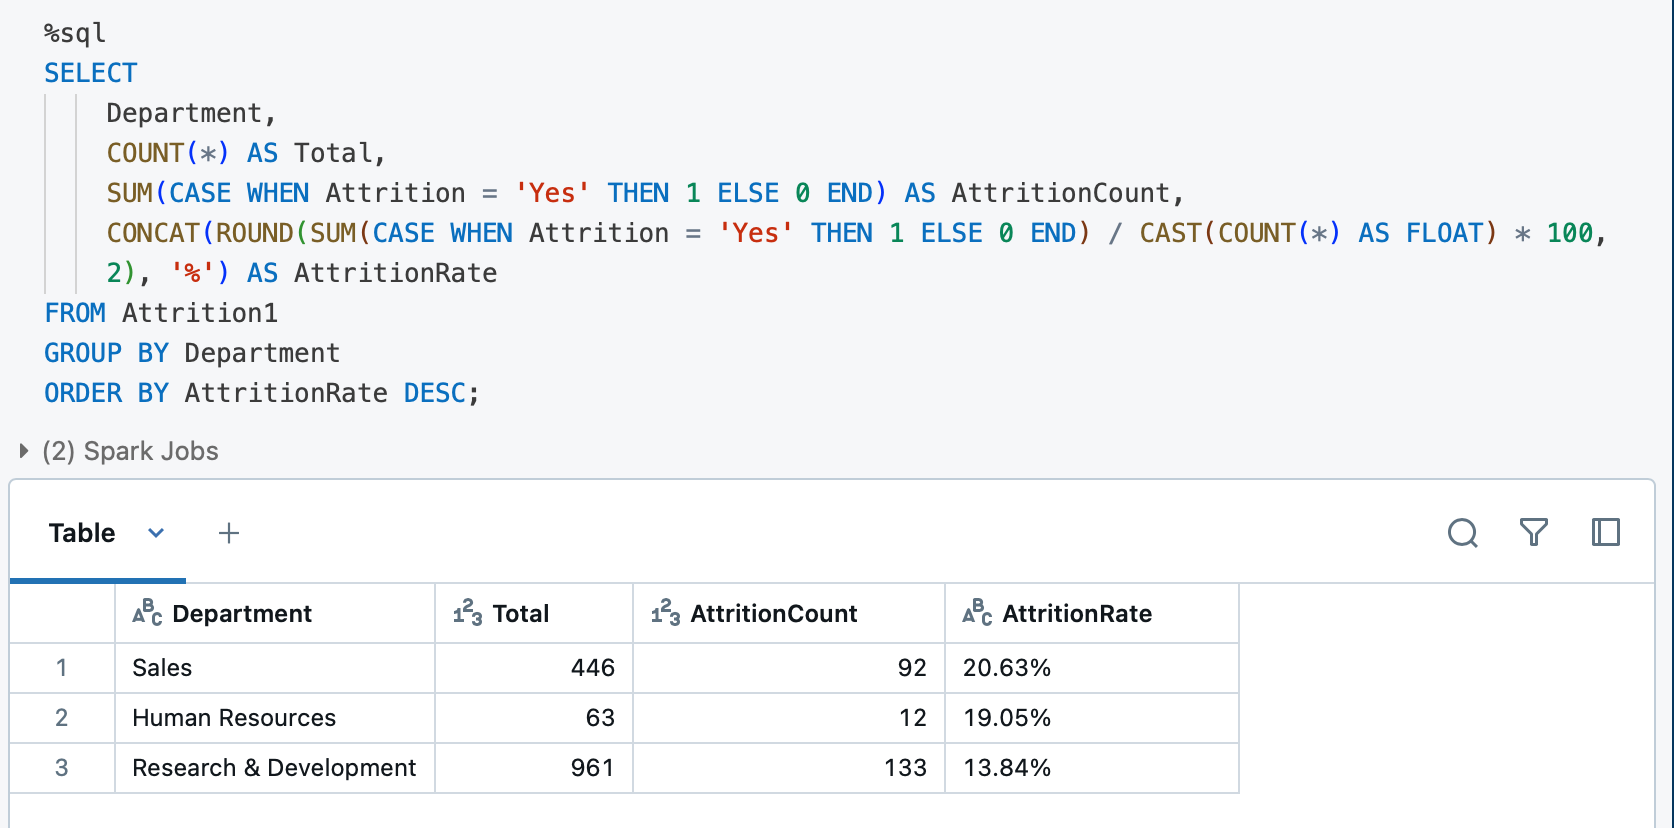

1- Let us visualize the result above:

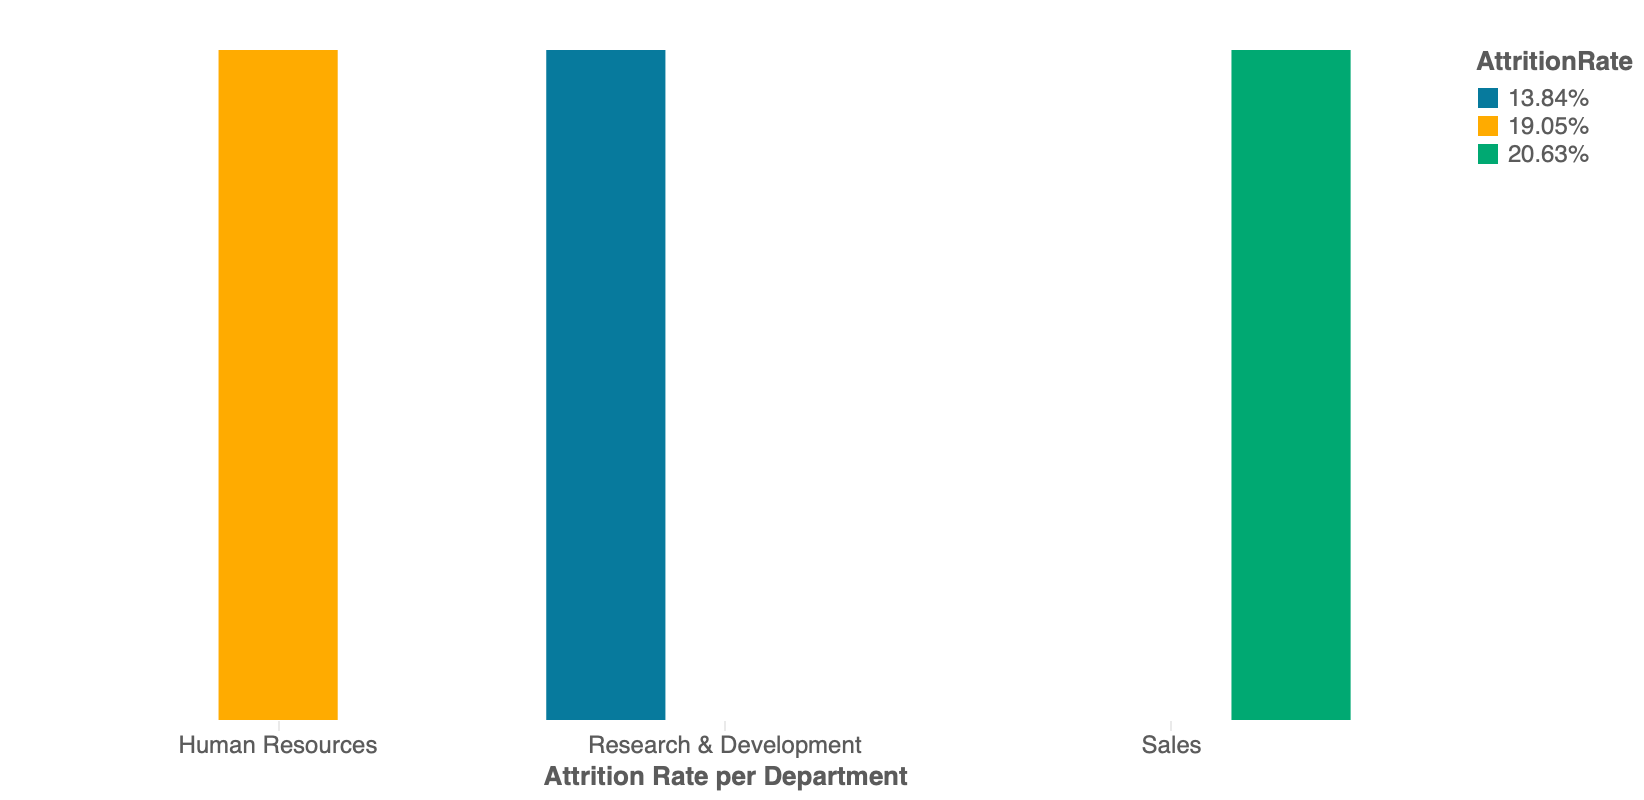

**Results analysis:**

The results show an element of high attrition rate in the Sales department (at 20.63%), followed by HR (at 19.05%) and at a moderate level in the R&D department (at 13.84%). We look at the attrition rate in order to perceive if there is a common pattern in each department when talents leave the organization.<br><br>

For the Sales department, we may assume there are factors that contribute to a high level of attrition, such as a comission-based salary, which depends on the employee performance meeting their sales target, the pressure to achieve that target and the job market demand for that type of professional.<br><br>

Since the HR department had a significant high attrition rate, we can assume there might be gaps in the organization's structure. For instance, employees might leave the organization due to heavy workload, limited recognition for their work, internal conflicts, constant changes in regulations and policies and burnout from dealing with those changes and employee issues.

***2- Do JobSatisfaction, EnvironmentSatisfaction and RelationshipSatisfaction have strong impact on attrition?***

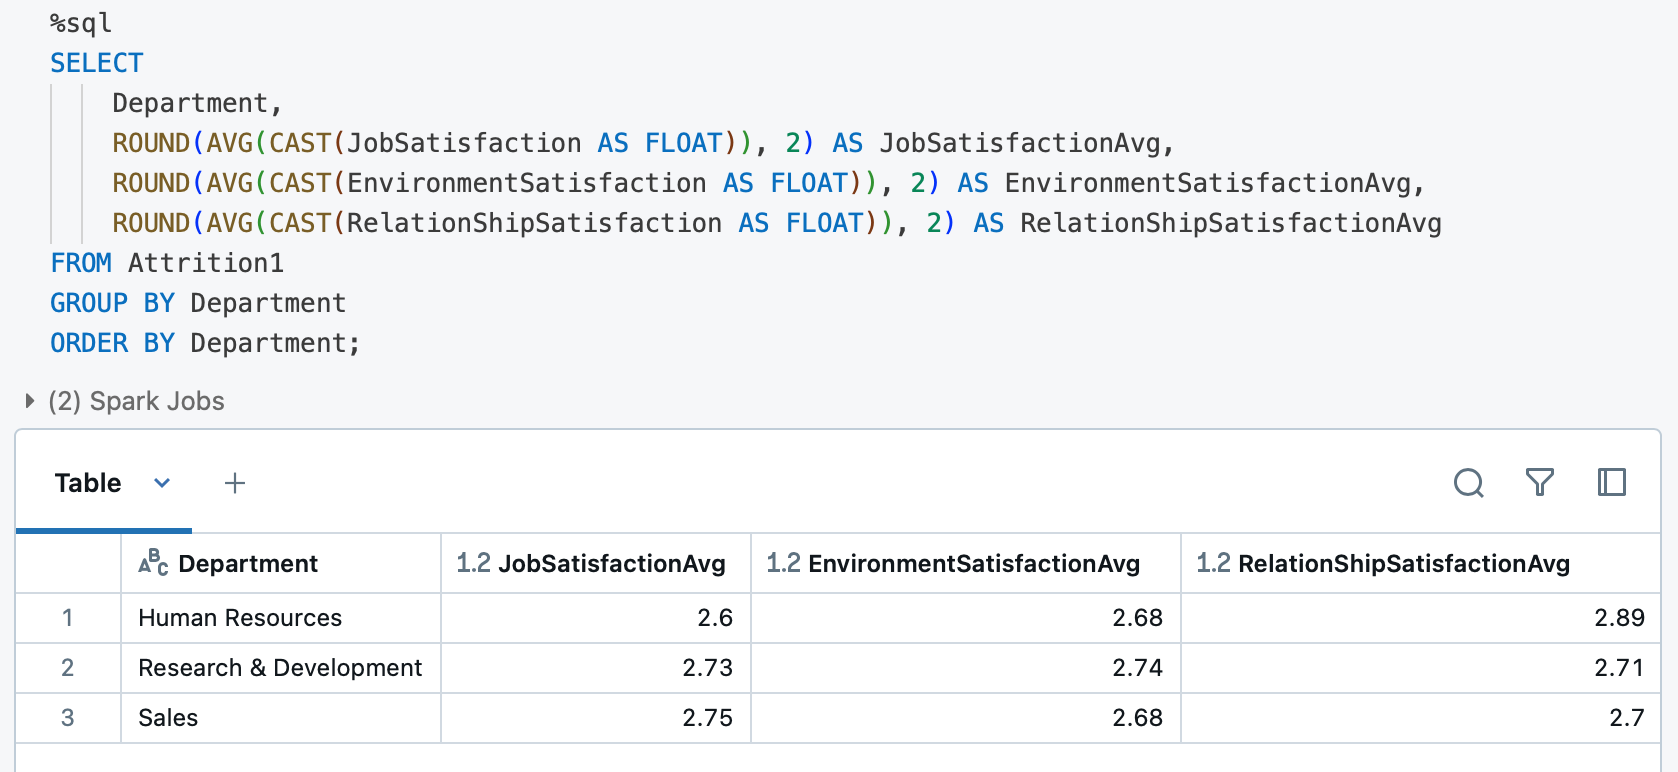

Previously, we saw the high level of attrition in two departments: Sales and HR. From that point, we will dig in to the other variables part of the IBM survey, where they have gathered the dataset information from.

Let us observe whether JobSatisfaction, Environment Satisfaction and Relationship Satisfaction have a weight on the attrition rate.<br><br>

**Results analysis:**

The satisfaction is measured by the lowest value 1, going through 2, 3 and the highest value being 4. The average value for all of the three Satisfaction variables is around 2.6 - 2.9, which represents a medium degree of overall satisfaction. However, those values involve both employees who have left the organization and the ones who are currently working in the organization.

For a better understanding of how Satisfaction might be a factor of influence in attrition, we will answer the questions for Satisfation splitting the two groups: employees who have left the organization and the ones who are currently working in the organization


***3- What are the JobSatisfaction, EnvironmentSatisfaction and RelationshipSatisfaction rates for those employees who have left the organization (experienced attrition)?***

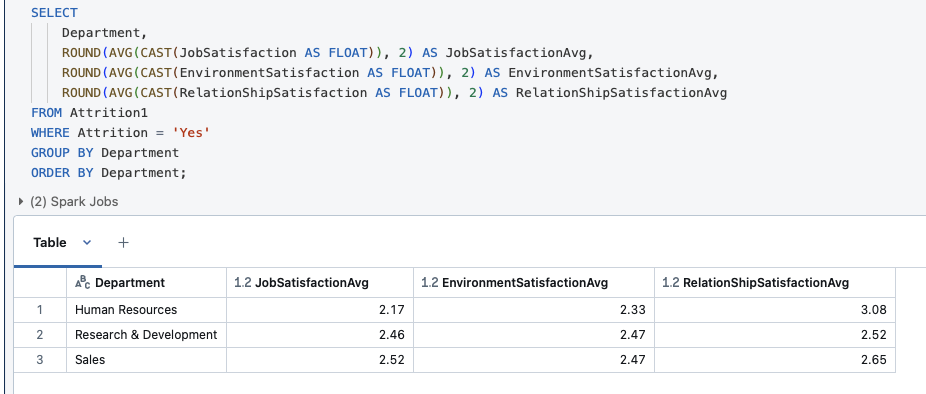

**Results Analysis:**

A number that stands out imediately is the average rate for Relationship Satisfaction in the Human Resources department. 3.08 is considered *high* and, therefore, should be further investigated. We have named a list of potential factors behind the attrition in the HR department, and when it comes down to relationships in the work environment, this raises a red flag to internal conflicts, managerial behaviour and/or other human-related subjects.

***4- What are the JobSatisfaction, EnvironmentSatisfaction and RelationshipSatisfaction rates for those employees who are currently working in the organization?***

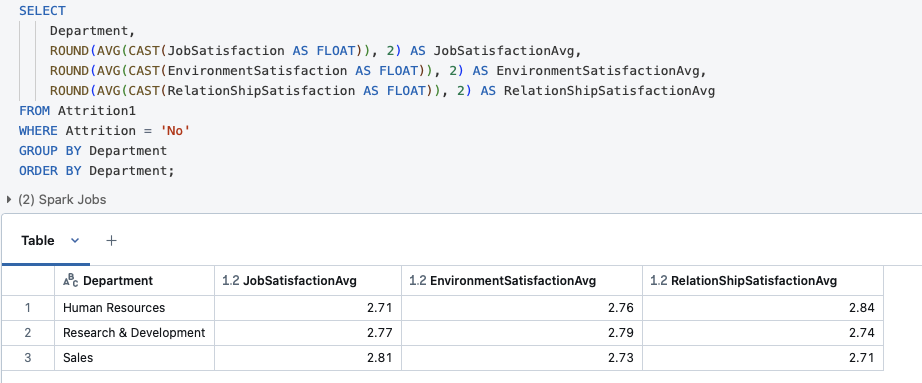

**Results Analysis:**

A quick look in the results gives us an overall notion of a moderate to high satisfaction in all the three variables for the current employees. This implies employees currently working at the company seem to be fairly happy about their job, work environment and relationships.

However, since the attrition is somewhat moderate to high, at a managerial level, it is advised to develop news means to check satisfaction levels.

***5- What is the attrition rate for employees based on the number of years they have worked at the company?***

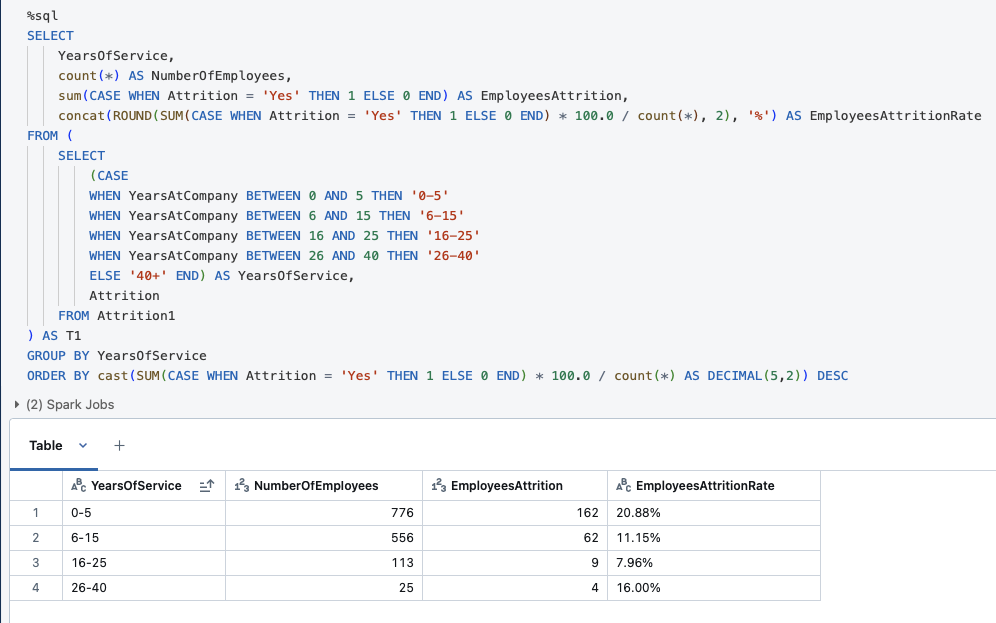

**Results Analysis:**

From the employee satisfaction results, we are automatically forced to investigate how long the organization has had those employees. The number of years in a company can generate different feelings, such as the feeling of belonging, the feeling of being stuck, the feeling of excitement for new internal opportunities but also attrition includes retirement - this last one usually happens with a certain time frame of being of service. There are other factors or feelings one might develop throughout the years of service in an organization.<br><br>

For the results show above, the highest attrition rate belongs to the employees in their early years of service. Around 21% of employees who left the organization worked there between zero to five years, whereas the lowest attrition rate falls under sixteen to tweenty five years of service. This information gives us an overall idea of new culture or management change issue but it does not rely on an in-depth analysis of the type of job it refers to: maybe it is a seasonal job and that is why individuals tend to leave? Or the lowest attrition rate is because people tend to seek career stability?<br><br>

There is not enough information as to define with certainty the reason for the attrition based on the years of service.

***6- What is the percentage salary hike for the employees who currently work in the organization and for the ones who have left the company (experienced attrition)?***

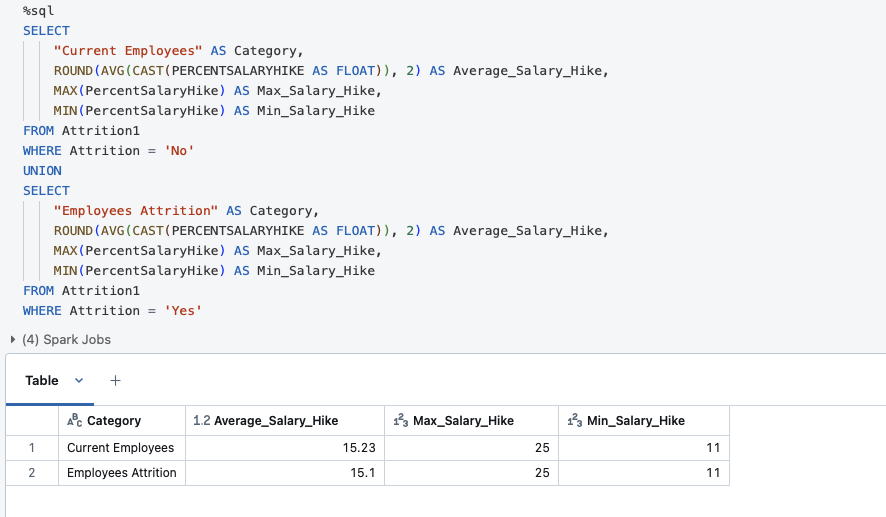



**Results Analysis:**

When we discuss salary hike, we often mean the reasons behind it: great performance, length within the company, a promotion or the company has grown economically.

If we look at the results, both categories (current employees and the employees who experienced attrition) had similar salary hike of around 15%, also presenting max variation of 25% and minimum of 11%. This means both categories were granted similar salary increase and, therefore, it seems this variable does not translate the solution for our problem.


***7- Does the high or low JobLevel (hierarchical role level) in given roles represent higher attrition rate?***

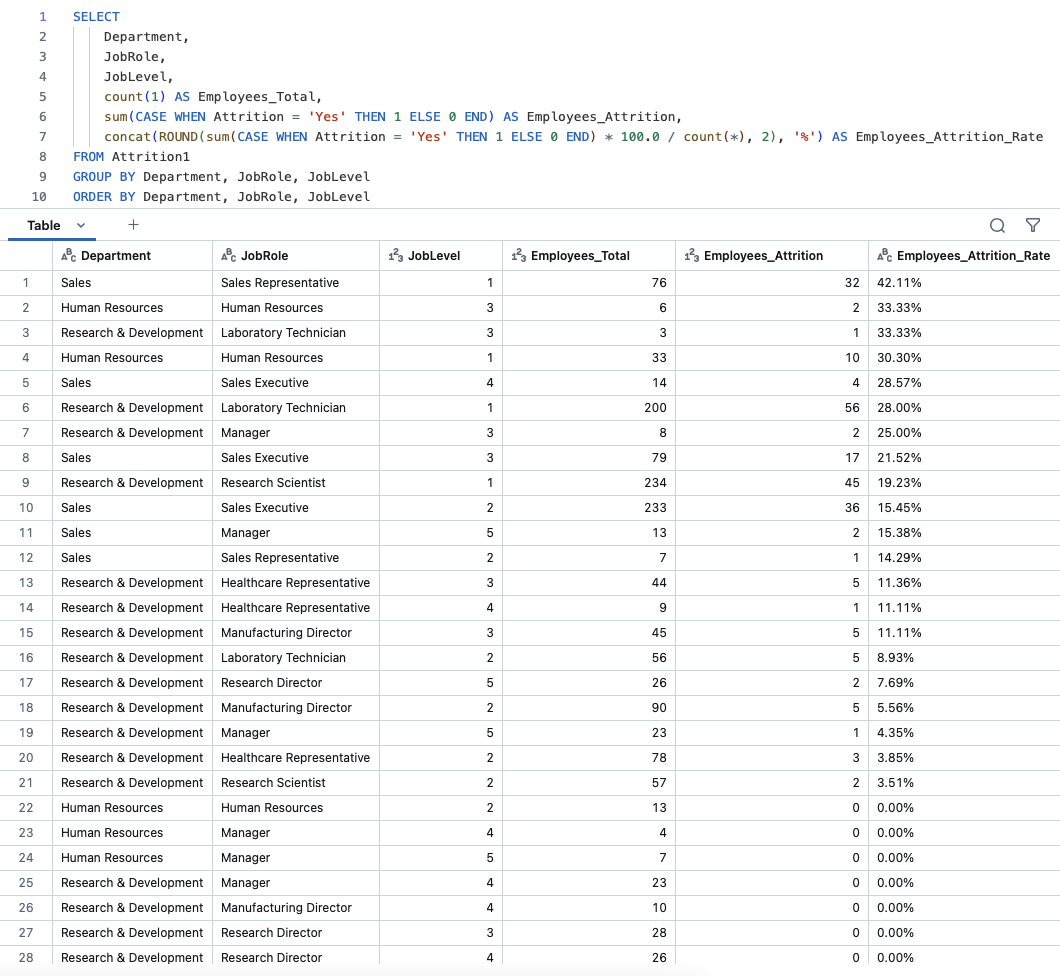

**Results Analysis:**

The results were listed by department but it was necessary to filter the Employees_Attrition_Rate so that we could focus on the highest attrition rates first.<br><br>

**Sales Department:** 'Sales Representative' at level 1 leads the list with the highest attrition rate, not only for the Sales department but compared to the whole organization. The number of employees who have left from that job level is quite impressive and deserves further exploration as to find ways for better retention. For levels 2, 4 and 5 the attrition rates seem high, however, the actual number of employees who have left are not extremely high as with the level 1 workers.  <br><br>

**Human Resources Department:** Although job level 3 has the highest attrition rate, it does not show a high number of employees, being only 2 out of 6. On the other hand, the job level 1 has a slightly lower attrition rate if compared to job level 3 but the actual number of employees is much higher: 10 out of 33. It is not explicit what their job role is or what their job entails, which limits the analysis to subjective conclusions. It is important to note that there is no attrition rate for job levels 2, 4 and 5, being job role for job level 2 also unspecified.<br><br>


**Research & Development Department:** It shows that job level 3 for job roles Lab Technician and Manager are pointed out as the highest attrition rate, however with a low actual number of employees. Just as in the case of the HR department, the level 1 with a slight lower attrition rate presents a huge amount of employees count, being 56 out of 200 who have left the company.



We will be able to see now the trend we just analysed in a concise fashion: ***Employee Attrition Rate by Job Level***

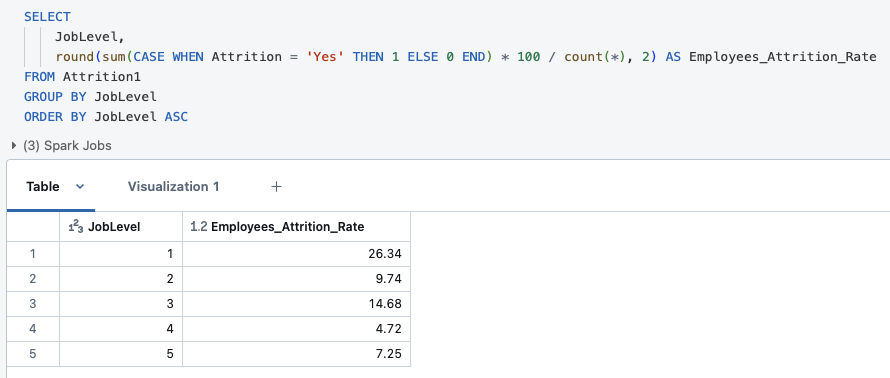

Let us visualize it and analyze it:

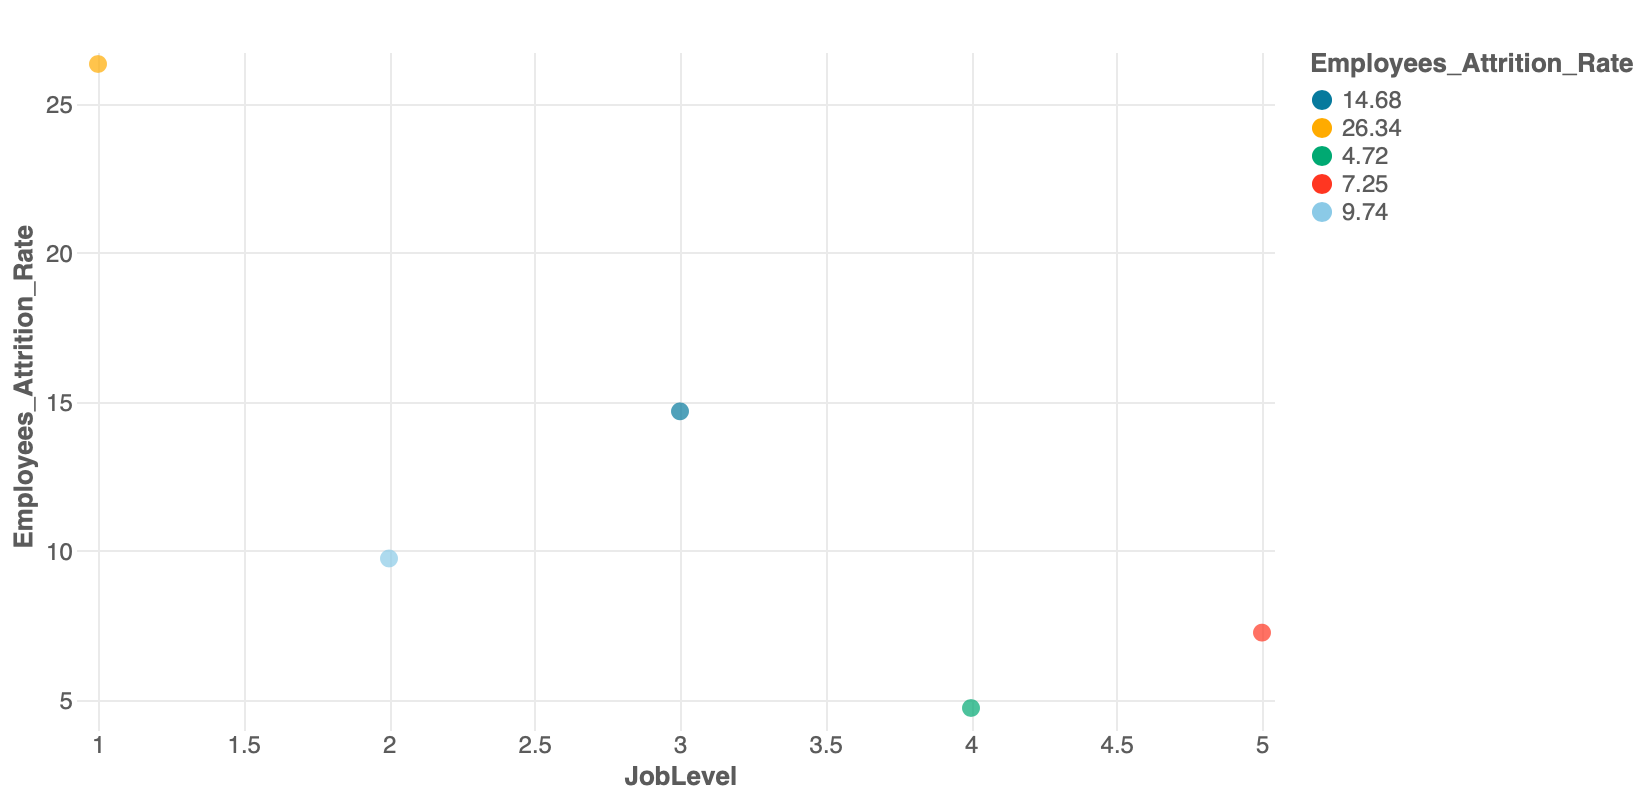

An overall observed trend is that employees at job level 1 have the highest attrition rate if compared to the other job levels. Perhaps there might be challenges to transit to the other levels, creating some sort of barrier preventing entry level workers to pass through. This seems to be a major issue when it comes to retention planning and strategy.

***8- How long have employees been working in the same role?***

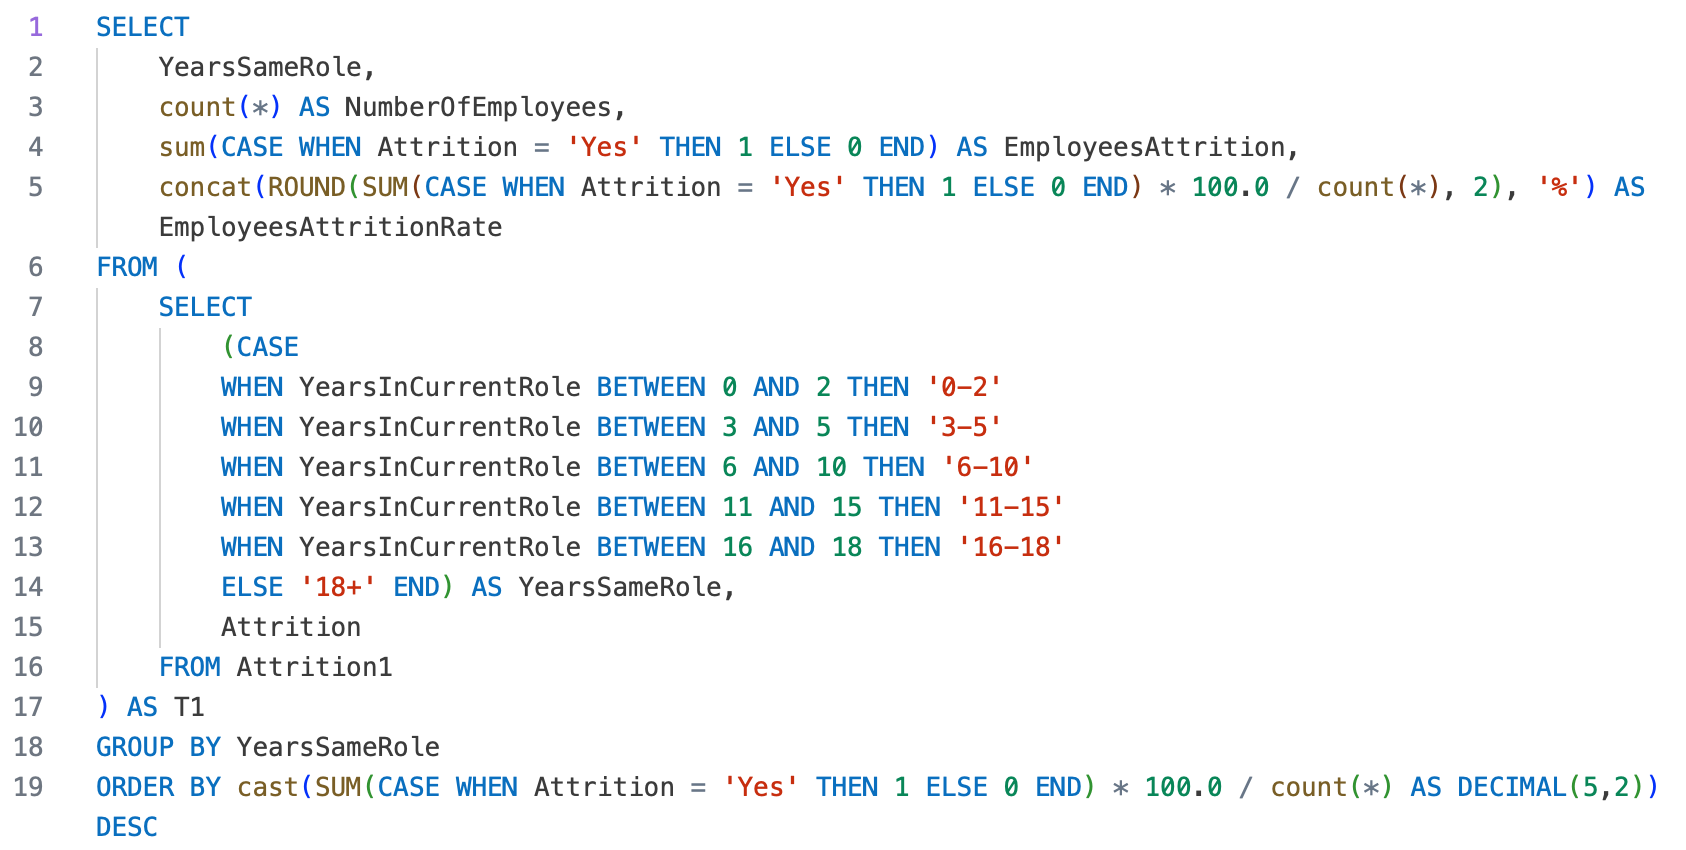

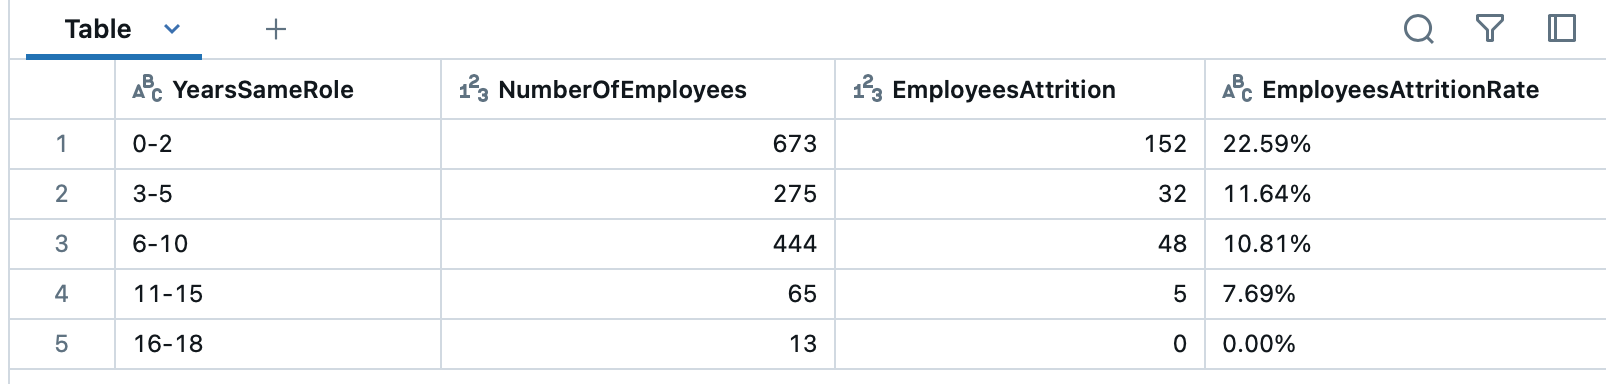

**Results Analysis:**

It is important to see if the employee attrition was related to the years employees worked in the same role. From the results, we see the greatest majority falling under 0-2 years (22.59%), followed by 3-5 years (11.64%) working in the same role. Then we will notice that the longer employees worked in the same role, the lowest is the employee attrition. <br><br>

However, let us see those numbers from the perspective of the company policies. Organizations have their own policies, developed by shareholders and business sector specialists. This means there might be a chance the organization has a policy that changes the employees role levels without changing their role at all. If that is the case, the years working in the current role might not be accurate enough and in the dataset there is a column for job level, as previously analyzed, but there is not information on how long employees worked at that same level.

## 3.0 Conclusion

In this project, we examined informative details on people and their work and life routine to predict whether certain data features could lead to people attrition. <br><br>

We had the objective to reflect on: ***what may contribute to the levels of attrition in a company?***
<br><br>
To ensure the highest prediction accuracy, we initially employed some data modeling to storage the data and developed a data catalog for a clear understanding of the data and data transparency, minimizing redundancy and improving data quality. We also looked into the data lineage to ensure where the data came from and how it is been extracted. <br><br>

We have used SQL to remove unecessary columns and left remaining some columns which were not used in the analysis, but they might be considered relevant for further explorations. <br><br>

For the ETL, we exercised the Medallion layers (bronze, silver and gold), created a schema and a table with the changes for each of them. However, the whole process from ingestion through transformation and loading was effectivelly done using plain SQL language without the support from the Medallion layers. I have added the Medallion layers to follow the best practices.<br><br>

In order to reflect on our objective, I have elaborated eight questions that aimed to investigate some varialbles and their influence in the people attrition issue. <br><br>

Some questions provided a good hint for the objective, others left puzzled and intriguing feelings and a couple of questions were not answered as accurately expected. <br><br>

In the following session, I have drawn considerations for future analysis and a self-evaluation.


## 4.0 Further Considerations

*   There are some theories that suggest employees leave the organization because there is a conflictual relationship with their direct manager. I would suggest a detailed investigation on how long employees who left the organization worked with the same manager.
<br>

*   On the same note as above, I would suggest new data on who else have worked with each manager throughout the years to check employee satisfaction towards management behaviour.
<br>

*   Also, there is data based on survey for inadequate training, which seems valid but incomplete. This is due to the lack of preciseness, such as in what type of training would be adequate, who would design the necessary training and based on what need? This could be a great starting point to better understand this variable.

## 5.0 Self-evaluation

The development of this MVP was undeniably a challenging and yet exciting exercise, which gave me the opportunity to explore my passion and experience in Human Resources combined with Analytics.

The challenges were related to my unfamiliarity with cloud platforms and the whole ETL process in it. However, the barrier I considered a bit intimidating at first, now, after exploring the theory with practical knowledge, I find it relatively simple.

In my understanding, the objectives outlined at the beginning of the project were achieved and I was able to learn a lot about the subject as I went through discoveries myself.

A very positive point in this MVP was the contact with practice in a cloud environment. This was also the point of greatest focus and much of the time was spent on this learning. Since Databricks was pretty new to me, there were some terms and configurations that required more attention than I thought when I started this journey.

Now that the project is finished, I can see several opportunities for further exploration in the data and I am planning to do an in-depth investigation to answer other queries.

I am pleased with the completed work and grateful to the lecturers for guiding me end-to-end throughout this project.